Regresión Lineal Múltiple
MAE: 133410.5690388431
MSE: 24273133053.588814
RMSE: 155798.37307747733
Porcentaje de MAE: 24.26%
Porcentaje de RMSE: 28.34%
Conclusión: El modelo es óptimo (MAE aceptable).
Conclusión: El modelo es óptimo (RMSE aceptable).


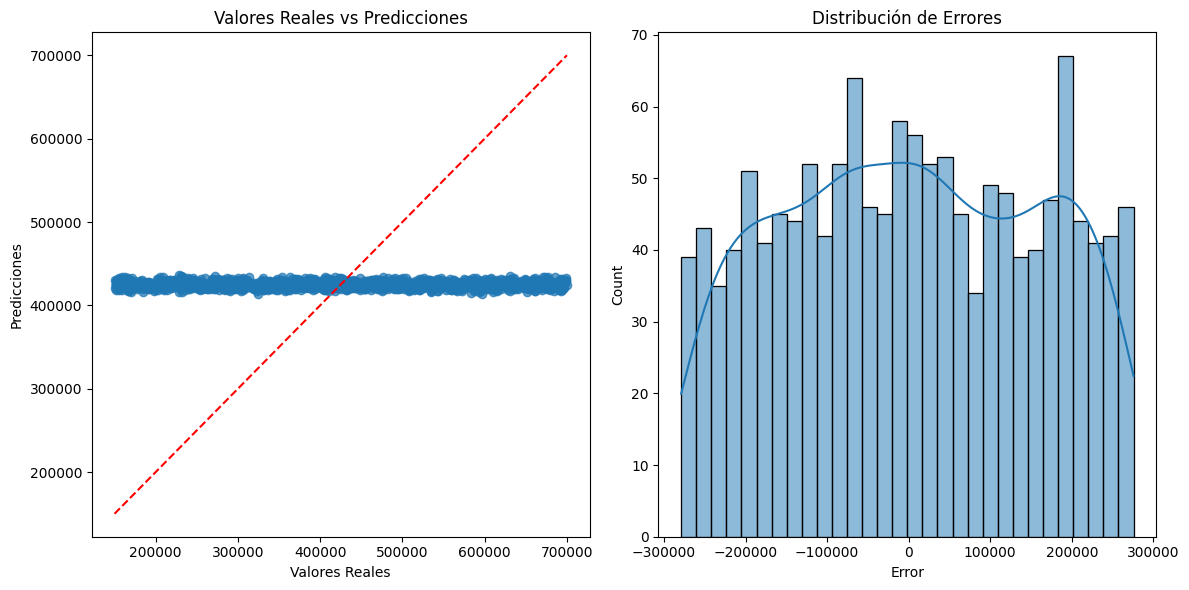


Regresión Polinómica
MAE: 133566.36890185866
MSE: 24324832232.28861
RMSE: 155964.2017653045
Porcentaje de MAE: 24.29%
Porcentaje de RMSE: 28.37%
Conclusión: El modelo es óptimo (MAE aceptable).
Conclusión: El modelo es óptimo (RMSE aceptable).


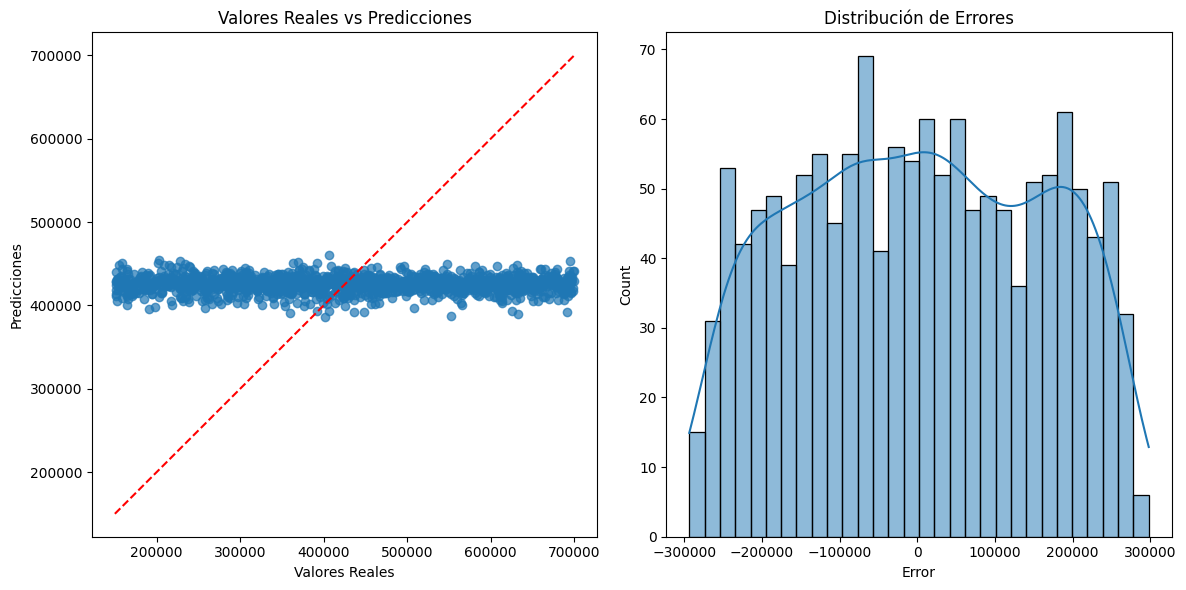


Árbol de Decisión
MAE: 134190.74557374322
MSE: 24776111364.77534
RMSE: 157404.29271393883
Porcentaje de MAE: 24.41%
Porcentaje de RMSE: 28.63%
Conclusión: El modelo es óptimo (MAE aceptable).
Conclusión: El modelo es óptimo (RMSE aceptable).


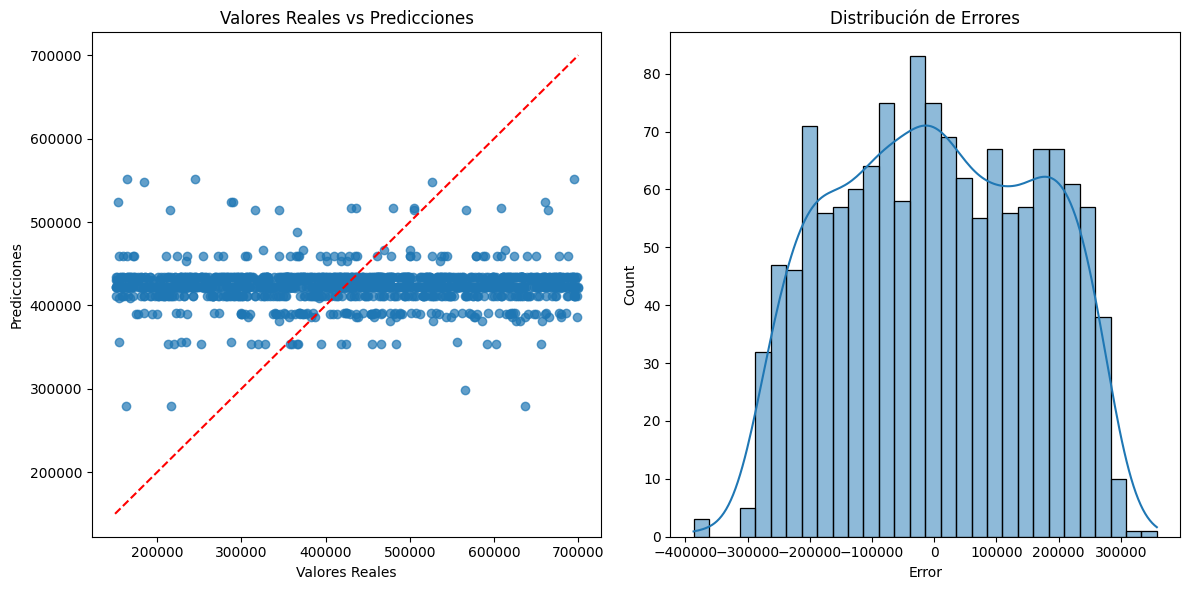


Random Forest
MAE: 136185.83652142857
MSE: 25825705076.39996
RMSE: 160703.78052927056
Porcentaje de MAE: 24.77%
Porcentaje de RMSE: 29.23%
Conclusión: El modelo es óptimo (MAE aceptable).
Conclusión: El modelo es óptimo (RMSE aceptable).


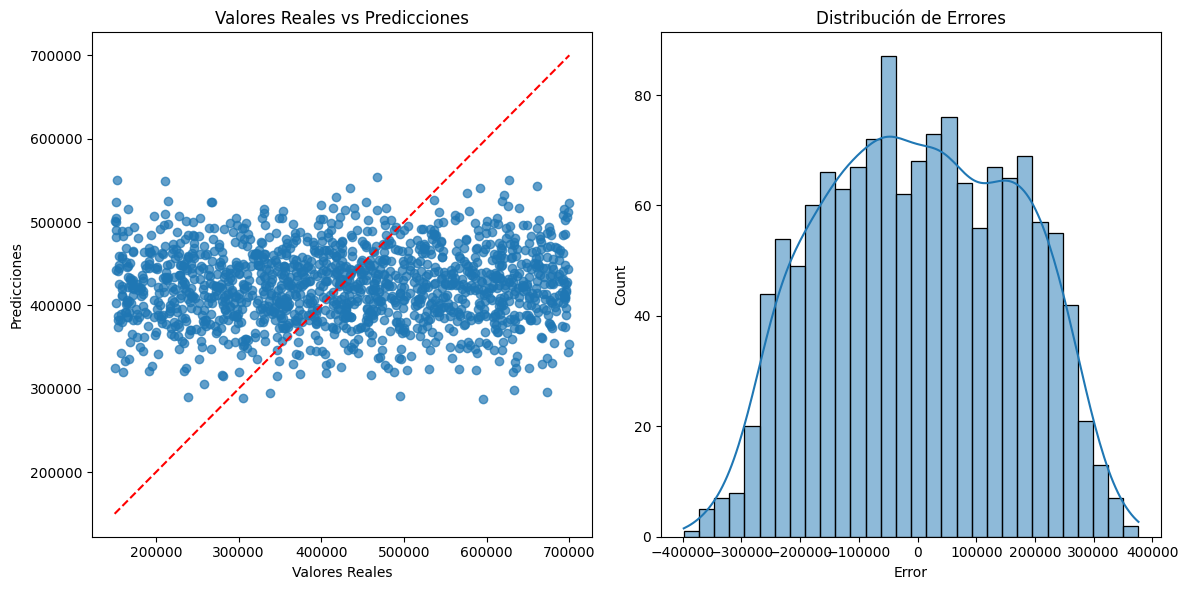


Gradient Boosting (XGBoost)
MAE: 134127.23292410714
MSE: 24917203568.66459
RMSE: 157851.84056153602
Porcentaje de MAE: 24.40%
Porcentaje de RMSE: 28.71%
Conclusión: El modelo es óptimo (MAE aceptable).
Conclusión: El modelo es óptimo (RMSE aceptable).


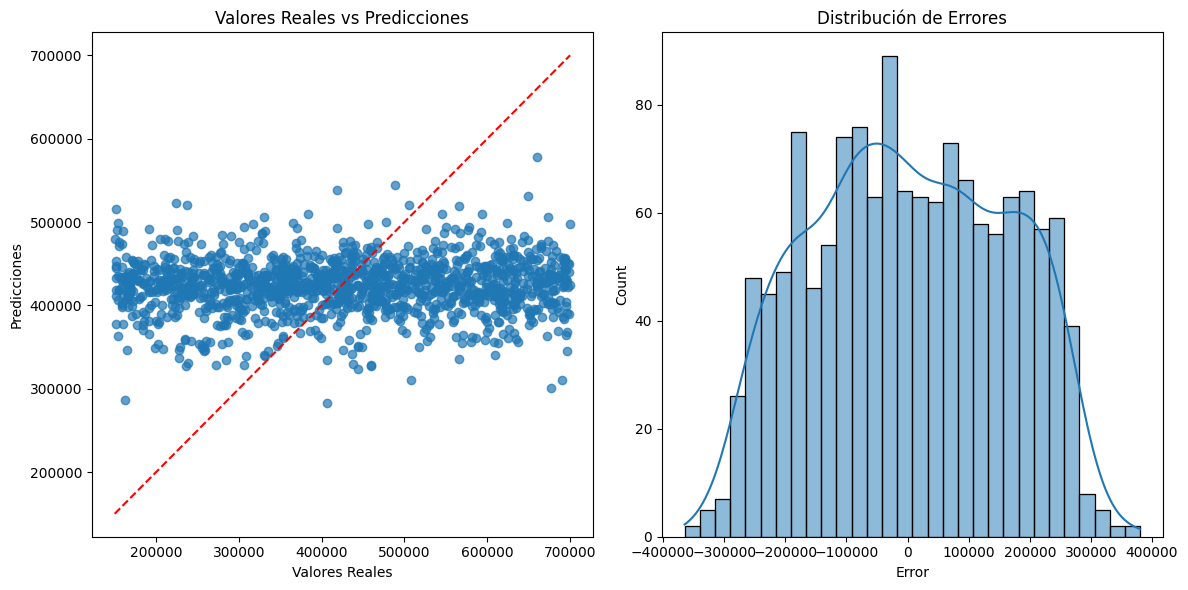

interactive(children=(Dropdown(description='Modelo:', options=('Regresión Lineal', 'Regresión Polinómica', 'Ár…

<function __main__.predict_price(model_name, house_size, num_bedrooms, num_bathrooms, garage_spaces, age, location_score)>

In [9]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import joblib  # Para guardar y cargar los modelos
from ipywidgets import interact
import ipywidgets as widgets

# Cargar y preprocesar el dataset
data = pd.read_csv('house.csv')
X = data.drop('Price', axis=1)
y = data['Price']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función de evaluación del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    # Cálculo de porcentaje de eficiencia
    range_price = y.max() - y.min()
    mae_percentage = (mae / range_price) * 100
    rmse_percentage = (rmse / range_price) * 100
    
    print(f"Porcentaje de MAE: {mae_percentage:.2f}%")
    print(f"Porcentaje de RMSE: {rmse_percentage:.2f}%")
    
    # Conclusiones sobre la optimización del modelo
    mae_threshold = 30  # Porcentaje de MAE permitido
    rmse_threshold = 30  # Porcentaje de RMSE permitido
    
    if mae_percentage < mae_threshold:
        print("Conclusión: El modelo es óptimo (MAE aceptable).")
    else:
        print("Conclusión: El modelo no es óptimo (MAE elevado).")

    if rmse_percentage < rmse_threshold:
        print("Conclusión: El modelo es óptimo (RMSE aceptable).")
    else:
        print("Conclusión: El modelo no es óptimo (RMSE elevado).")
    
    # Gráficos de comparación de predicciones
    plt.figure(figsize=(12, 6))
    
    # Gráfico de dispersión de valores reales vs predicciones
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Valores Reales vs Predicciones')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
    
    # Gráfico de errores
    plt.subplot(1, 2, 2)
    errors = y_test - y_pred
    sns.histplot(errors, bins=30, kde=True)
    plt.xlabel('Error')
    plt.title('Distribución de Errores')
    
    plt.tight_layout()
    plt.show()

# 1. Regresión Lineal Múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Regresión Lineal Múltiple")
evaluate_model(linear_model, X_test, y_test)
# Guardar el modelo entrenado
joblib.dump(linear_model, 'linear_model.pkl')

# 2. Regresión Polinómica (Grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
print("\nRegresión Polinómica")
evaluate_model(poly_model, poly.transform(X_test), y_test)
# Guardar el modelo entrenado y la transformación polinómica
joblib.dump(poly_model, 'poly_model.pkl')
joblib.dump(poly, 'poly_transform.pkl')

# 3. Árbol de Decisión - Optimización
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
tree_model.fit(X_train, y_train)
print("\nÁrbol de Decisión")
evaluate_model(tree_model, X_test, y_test)
# Guardar el modelo entrenado
joblib.dump(tree_model, 'tree_model.pkl')

# 4. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("\nRandom Forest")
evaluate_model(rf_model, X_test, y_test)
# Guardar el modelo entrenado
joblib.dump(rf_model, 'rf_model.pkl')

# 5. Gradient Boosting (XGBoost) - Optimización
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=3, random_state=42)
xg_model.fit(X_train, y_train)
print("\nGradient Boosting (XGBoost)")
evaluate_model(xg_model, X_test, y_test)
# Guardar el modelo entrenado
joblib.dump(xg_model, 'xg_model.pkl')

# Interfaz para predicción
def predict_price(model_name, house_size, num_bedrooms, num_bathrooms, garage_spaces, age, location_score):
    input_data = np.array([[house_size, num_bedrooms, num_bathrooms, garage_spaces, age, location_score]])
    
    # Escoger modelo
    if model_name == 'Regresión Lineal':
        price = linear_model.predict(input_data)
    elif model_name == 'Regresión Polinómica':
        price = poly_model.predict(poly.transform(input_data))
    elif model_name == 'Árbol de Decisión':
        price = tree_model.predict(input_data)
    elif model_name == 'Random Forest':
        price = rf_model.predict(input_data)
    elif model_name == 'XGBoost':
        price = xg_model.predict(input_data)
        
    print(f"Predicción de precio: ${price[0]:,.2f}")

# Crear una interfaz interactiva
interact(
    predict_price,
    model_name=widgets.Dropdown(
        options=['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'XGBoost'],
        description='Modelo:'
    ),
    house_size=widgets.IntSlider(min=500, max=5000, step=50, value=2500, description='House Size'),
    num_bedrooms=widgets.IntSlider(min=1, max=5, step=1, value=3, description='Num Bedrooms'),
    num_bathrooms=widgets.IntSlider(min=1, max=5, step=1, value=2, description='Num Bathrooms'),
    garage_spaces=widgets.IntSlider(min=0, max=3, step=1, value=1, description='Garage Spaces'),
    age=widgets.IntSlider(min=0, max=50, step=1, value=10, description='Age'),
    location_score=widgets.FloatSlider(min=1, max=10, step=0.1, value=5, description='Location Score')
)
